## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### April 2019

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [2]:
#df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [4]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
#Showing  the weights
mlp.coefs_

[array([[-1.92820890e+01, -2.19841893e-02,  4.66104299e+01,
         -1.21213273e+01, -1.66590970e+01],
        [ 9.29642622e+01, -3.73196971e-01,  4.15511688e+01,
         -1.23324663e+01, -3.20026866e+00]]), array([[-7.18512710e-04],
        [ 9.44033864e-01],
        [ 1.11428608e-02],
        [ 1.96766347e+00],
        [-1.39397670e+00]])]

In [6]:
#Showing the biases
mlp.intercepts_

[array([-7.47131343,  0.45692388,  1.40025247, -0.1631193 ,  0.57265452]),
 array([-51.63764171])]

In [7]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.84499338e-10, 9.99999999e-01],
       [1.03206332e-12, 1.00000000e+00],
       [3.92151844e-09, 9.99999996e-01],
       [2.20098391e-08, 9.99999978e-01],
       [1.10263353e-07, 9.99999890e-01],
       [5.65724556e-09, 9.99999994e-01],
       [8.18338161e-04, 9.99181662e-01],
       [1.65178689e-03, 9.98348213e-01],
       [2.30747643e-10, 1.00000000e+00],
       [1.06037401e-10, 1.00000000e+00],
       [3.11151665e-01, 6.88848335e-01],
       [8.11610808e-06, 9.99991884e-01],
       [3.51427264e-06, 9.99996486e-01],
       [2.62681737e-02, 9.73731826e-01],
       [1.15009104e-04, 9.99884991e-01],
       [1.78336739e-01, 8.21663261e-01],
       [2.22541411e-02, 9.77745859e-01],
       [1.61044191e-04, 9.99838956e-01],
       [5.06839017e-07, 9.99999493e-01],
       [9.933608

In [8]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [9]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [10]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



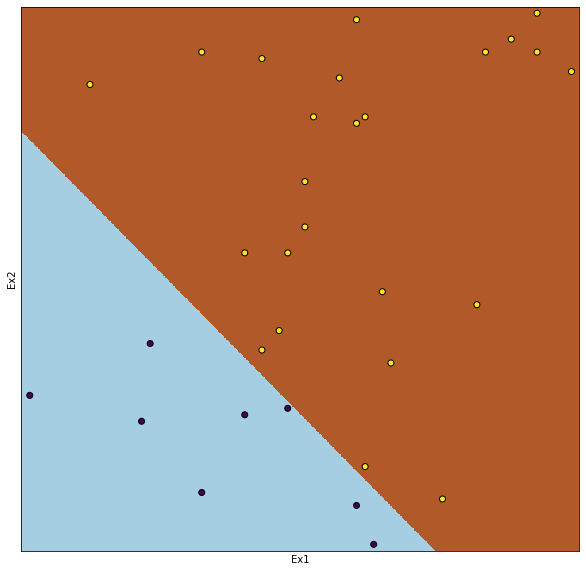

In [11]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [12]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [14]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [15]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

### Example 2. Nnets applied to Diabetes

In [16]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [17]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [18]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
#mlp.coefs_

In [20]:
#mlp.intercepts_

In [21]:
pred=mlp.predict(X_test)

In [22]:
mlp.score(X_test, y_test)

0.6458333333333334

In [23]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73       119
           2       0.54      0.47      0.50        73

    accuracy                           0.65       192
   macro avg       0.62      0.61      0.61       192
weighted avg       0.64      0.65      0.64       192



#### The overfitting problem in Neural Nets 

In [24]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.5338541666666666

In [25]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=1000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.8151041666666666

In [26]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=1000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.4700520833333333

In [27]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100),max_iter=1000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.8645833333333334

In [28]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(200),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.65234375

In [29]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6510416666666666

In [30]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6328125

In [31]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6510416666666666

In [32]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.6510416666666666

In [33]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6561859193438141


In [34]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6534347231715653


In [35]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.5731373889268626


In [36]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6471804511278196


### Example 3. Nnet  applied to Landsat 

In [37]:
#Cargando el conjunto de datos Landsat
#url='http://academic.uprm.edu/eacuna/landsat.txt'
url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[355   0   5   0   1   0]
 [  1 172   0   3   1   0]
 [  3   0 327   0   0   4]
 [  0   1 134  11   3  29]
 [  7   5   2   0 142  18]
 [  0   2  84   8   4 287]]


In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       361
           2       0.96      0.97      0.96       177
           3       0.59      0.98      0.74       334
           4       0.50      0.06      0.11       178
           5       0.94      0.82      0.87       174
           7       0.85      0.75      0.79       385

    accuracy                           0.80      1609
   macro avg       0.80      0.76      0.74      1609
weighted avg       0.81      0.80      0.77      1609



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [41]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O cluster uptime:,31 mins 41 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.4835
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_eacun_4jblcp
H2O cluster total nodes:,1
H2O cluster free memory:,3.281 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [42]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.7877604166666666]


In [44]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.14528075844497126
RMSE: 0.38115713091187375
LogLoss: 0.44325993466607705
Mean Per-Class Error: 0.2037014925373135
AUC: 0.879320895522388
pr_auc: 0.7849592573831589
Gini: 0.758641791044776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5117117164712486: 


,,1,2,Error,Rate
0,1,386.0,114.0,0.228,(114.0/500.0)
1,2,49.0,219.0,0.1828,(49.0/268.0)
2,Total,435.0,333.0,0.2122,(163.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.511712,0.728785,188.0
1,max f2,0.249229,0.833333,270.0
2,max f0point5,0.742838,0.740072,113.0
3,max accuracy,0.742838,0.804688,113.0
4,max precision,0.998173,1.000000,0.0
5,max recall,0.012754,1.000000,389.0
6,max specificity,0.998173,1.000000,0.0
7,max absolute_mcc,0.511712,0.566659,188.0
8,max min_per_class_accuracy,0.546662,0.786000,178.0
9,max mean_per_class_accuracy,0.410969,0.796299,221.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 44.01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.988665,2.865672,2.865672,1.000000,0.993610,1.000000,0.993610,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,0.981608,2.865672,2.865672,1.000000,0.984693,1.000000,0.989151,0.029851,0.059701,186.567164,186.567164
2,,3,0.031250,0.974289,2.149254,2.626866,0.750000,0.977519,0.916667,0.985274,0.022388,0.082090,114.925373,162.686567
3,,4,0.040365,0.964160,2.865672,2.680790,1.000000,0.969584,0.935484,0.981731,0.026119,0.108209,186.567164,168.078960
4,,5,0.050781,0.957866,2.865672,2.718714,1.000000,0.961724,0.948718,0.977627,0.029851,0.138060,186.567164,171.871412
5,,6,0.100260,0.921722,2.413197,2.567940,0.842105,0.937959,0.896104,0.958051,0.119403,0.257463,141.319717,156.793952
6,,7,0.151042,0.889132,2.351320,2.495111,0.820513,0.906544,0.870690,0.940734,0.119403,0.376866,135.132032,149.511065
7,,8,0.200521,0.831146,1.960723,2.363249,0.684211,0.857404,0.824675,0.920172,0.097015,0.473881,96.072270,136.324869
8,,9,0.300781,0.709415,1.749176,2.158558,0.610390,0.770813,0.753247,0.870386,0.175373,0.649254,74.917620,115.855786
9,,10,0.399740,0.558737,1.282011,1.941563,0.447368,0.633815,0.677524,0.811821,0.126866,0.776119,28.201100,94.156255


In [45]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [46]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1574433618672_21


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0,,,,,,,,,
1,,2,20,Rectifier,0,0,0,0.000802403,0.00037763,0,0.00277288,0.437856,0.543121,0.233935
2,,3,20,Rectifier,0,0,0,0.000783162,0.000775689,0,-0.0164566,0.348615,1.0322,0.157775
3,,4,20,Rectifier,0,0,0,0.00190101,0.00650867,0,-0.0460862,0.437977,0.993098,0.189474
4,,5,2,Softmax,,0,0,0.00349312,0.00604862,0,0.0435458,1.84069,-0.00967228,0.00648504




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.01730711456826622
RMSE: 0.13155650713007783
LogLoss: 0.06337165596571713
Mean Per-Class Error: 0.017925373134328293
AUC: 0.9986343283582089
pr_auc: 0.8444911504929666
Gini: 0.9972686567164177

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.71957786300391: 


,,1,2,Error,Rate
0,1,497.0,3.0,0.006,(3.0/500.0)
1,2,8.0,260.0,0.0299,(8.0/268.0)
2,Total,505.0,263.0,0.0143,(11.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.195779e-01,0.979284,150.0
1,max f2,4.184079e-01,0.981550,170.0
2,max f0point5,7.195779e-01,0.984848,150.0
3,max accuracy,7.195779e-01,0.985677,150.0
4,max precision,9.999998e-01,1.000000,0.0
5,max recall,3.081562e-01,1.000000,184.0
6,max specificity,9.999998e-01,1.000000,0.0
7,max absolute_mcc,7.195779e-01,0.968441,150.0
8,max min_per_class_accuracy,6.456930e-01,0.977612,156.0
9,max mean_per_class_accuracy,7.195779e-01,0.982075,150.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 36.87 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164
2,,3,0.031250,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164
3,,4,0.040365,9.999997e-01,2.865672,2.865672,1.000000,9.999999e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164
4,,5,0.050781,9.999987e-01,2.865672,2.865672,1.000000,9.999993e-01,1.000000,1.000000,0.029851,0.145522,186.567164,186.567164
5,,6,0.100260,9.999169e-01,2.865672,2.865672,1.000000,9.999793e-01,1.000000,0.999990,0.141791,0.287313,186.567164,186.567164
6,,7,0.151042,9.985591e-01,2.865672,2.865672,1.000000,9.995180e-01,1.000000,0.999831,0.145522,0.432836,186.567164,186.567164
7,,8,0.200521,9.939757e-01,2.865672,2.865672,1.000000,9.965469e-01,1.000000,0.999021,0.141791,0.574627,186.567164,186.567164
8,,9,0.300781,9.271018e-01,2.828455,2.853266,0.987013,9.728842e-01,0.995671,0.990309,0.283582,0.858209,182.845513,185.326614
9,,10,0.399740,1.852290e-01,1.432836,2.501629,0.500000,6.143054e-01,0.872964,0.897226,0.141791,1.000000,43.283582,150.162866




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.19161565547331202
RMSE: 0.4377392551203422
LogLoss: 0.6002159805005863
Mean Per-Class Error: 0.26674626865671636
AUC: 0.7969216417910447
pr_auc: 0.6738770217429941
Gini: 0.5938432835820895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35762791399303157: 


,,1,2,Error,Rate
0,1,334.0,166.0,0.332,(166.0/500.0)
1,2,54.0,214.0,0.2015,(54.0/268.0)
2,Total,388.0,380.0,0.2865,(220.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.357628,0.660494,221.0
1,max f2,0.236303,0.768730,269.0
2,max f0point5,0.637894,0.646024,141.0
3,max accuracy,0.637894,0.752604,141.0
4,max precision,0.999516,1.000000,0.0
5,max recall,0.005451,1.000000,394.0
6,max specificity,0.999516,1.000000,0.0
7,max absolute_mcc,0.583731,0.453388,154.0
8,max min_per_class_accuracy,0.458926,0.726000,189.0
9,max mean_per_class_accuracy,0.357628,0.733254,221.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 43.28 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.996155,2.865672,2.865672,1.000000,0.997903,1.000000,0.997903,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,0.993305,2.149254,2.507463,0.750000,0.994621,0.875000,0.996262,0.022388,0.052239,114.925373,150.746269
2,,3,0.031250,0.987869,2.865672,2.626866,1.000000,0.990928,0.916667,0.994484,0.029851,0.082090,186.567164,162.686567
3,,4,0.040365,0.984930,2.456290,2.588349,0.857143,0.986336,0.903226,0.992644,0.022388,0.104478,145.628998,158.834858
4,,5,0.050781,0.978470,2.149254,2.498278,0.750000,0.982121,0.871795,0.990486,0.022388,0.126866,114.925373,149.827784
5,,6,0.100260,0.955860,2.186960,2.344640,0.763158,0.967850,0.818182,0.979315,0.108209,0.235075,118.695994,134.464043
6,,7,0.151042,0.911158,1.763490,2.149254,0.615385,0.932992,0.750000,0.963741,0.089552,0.324627,76.349024,114.925373
7,,8,0.200521,0.856489,1.508248,1.991084,0.526316,0.887229,0.694805,0.944861,0.074627,0.399254,50.824823,99.108354
8,,9,0.300781,0.690137,1.600310,1.860826,0.558442,0.769450,0.649351,0.886391,0.160448,0.559701,60.031014,86.082574
9,,10,0.399740,0.504876,1.395130,1.745539,0.486842,0.606378,0.609121,0.817071,0.138060,0.697761,39.512962,74.553940




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.7714822,0.04322055,0.884058,0.75342464,0.7777778,0.7613636,0.75,0.7846154,0.73170733,0.7638889,0.73417723,0.77380955
1,auc,0.8048257,0.04468988,0.9111111,0.79621214,0.7824463,0.74345237,0.79135805,0.8013333,0.7858586,0.7794239,0.83116883,0.82589287
2,err,0.22851776,0.04322055,0.11594203,0.24657534,0.22222222,0.23863636,0.25,0.21538462,0.2682927,0.2361111,0.2658228,0.22619048
3,err_count,17.7,4.2700505,8.0,18.0,16.0,21.0,21.0,14.0,22.0,17.0,21.0,19.0
4,f0point5,0.6624286,0.07809113,0.84821427,0.70422536,0.61904764,0.625,0.6451613,0.5607477,0.6010929,0.6870229,0.67901236,0.6547619
5,f1,0.69483155,0.071427986,0.82608694,0.7692308,0.61904764,0.6037736,0.6956522,0.6315789,0.6666667,0.6792453,0.7586207,0.6984127
6,f2,0.7360756,0.0907886,0.80508476,0.84745765,0.61904764,0.5839416,0.754717,0.72289157,0.7482993,0.67164177,0.859375,0.7482993
7,lift_top_group,1.9190825,1.3596274,2.875,2.2121212,0.0,3.142857,0.0,0.0,3.0370371,2.6666667,2.2571428,3.0
8,logloss,0.5937268,0.12129244,0.3617554,0.6453957,0.6087923,0.8222024,0.6063273,0.5119253,0.66255313,0.58024687,0.64152575,0.49654418
9,max_per_class_error,0.31970203,0.08386377,0.20833333,0.375,0.3809524,0.42857143,0.2777778,0.22,0.3090909,0.33333334,0.4318182,0.23214285



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-11-22 10:13:11,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-22 10:13:11,29.047 sec,72452 obs/sec,10.0,1,7680.0,0.381834,0.451298,0.358249,0.862802,0.767754,2.507463,0.204427
2,,2019-11-22 10:13:15,33.344 sec,89281 obs/sec,510.0,51,391680.0,0.131557,0.063372,0.923820,0.998634,0.844491,2.865672,0.014323



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,1.000000,1.000000,0.145132
1,C4,0.976233,0.976233,0.141682
2,C7,0.951525,0.951525,0.138096
3,C3,0.903728,0.903728,0.131160
4,C2,0.886661,0.886661,0.128683
5,C5,0.828785,0.828785,0.120283
6,C6,0.672264,0.672264,0.097567
7,C1,0.671099,0.671099,0.097398


<bound method H2OBinomialModel.confusion_matrix of >

### V . Ejemplo de deep Learning aplicado a Shuttle

In [47]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [48]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.9989655172413793]


In [49]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0009446555714952774
RMSE: 0.03073524965727914
LogLoss: 0.016500260244595336
Mean Per-Class Error: 0.13214365894367047

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,1.0,4.0,0.0,0.0,0.0,2.0,0.000205,"7 / 34,108"
1,3.0,20.0,0.0,6.0,8.0,0.0,0.0,0.459459,17 / 37
2,1.0,0.0,127.0,3.0,1.0,0.0,0.0,0.037879,5 / 132
3,2.0,2.0,3.0,6740.0,0.0,1.0,0.0,0.001186,"8 / 6,748"
4,2.0,2.0,0.0,1.0,2453.0,0.0,0.0,0.002034,"5 / 2,458"
5,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.333333,2 / 6
6,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.090909,1 / 11
7,34110.0,25.0,134.0,6750.0,2464.0,5.0,12.0,0.001034,"45 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998965
1,2,0.999471
2,3,0.999770
3,4,0.999839
4,5,0.999885
5,6,0.999931
6,7,1.000000


In [50]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1574433618672_115


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,601,386 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.1107,0.213763,0,-0.0341603,0.893535,0.489372,1.39693
2,,3,20,Rectifier,0,0,0,0.252489,0.386904,0,-0.0841944,0.763906,0.981553,0.79354
3,,4,7,Softmax,,0,0,0.595479,0.462092,0,-2.31331,2.13294,-1.9034,0.95685




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0009072099251287677
RMSE: 0.030119925715857396
LogLoss: 0.01361056587747259
Mean Per-Class Error: 0.2501270776536139

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7755.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000258,"2 / 7,757"
1,1.0,2.0,0.0,2.0,3.0,0.0,0.0,0.750000,6 / 8
2,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.000000,0 / 27
3,0.0,0.0,1.0,1582.0,0.0,0.0,0.0,0.000632,"1 / 1,583"
4,0.0,0.0,0.0,0.0,552.0,0.0,0.0,0.000000,0 / 552
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1 / 1
6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0 / 2
7,7756.0,3.0,29.0,1584.0,556.0,0.0,2.0,0.001007,"10 / 9,930"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998993
1,2,0.999396
2,3,0.999899
3,4,0.999899
4,5,1.000000
5,6,1.000000
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0014269921440351852
RMSE: 0.037775549553053296
LogLoss: 0.01695594038425191
Mean Per-Class Error: 0.2437320559544071

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34099.0,0.0,5.0,2.0,1.0,0.0,1.0,0.000264,"9 / 34,108"
1,9.0,13.0,0.0,11.0,4.0,0.0,0.0,0.648649,24 / 37
2,10.0,0.0,117.0,1.0,4.0,0.0,0.0,0.113636,15 / 132
3,2.0,3.0,2.0,6739.0,1.0,1.0,0.0,0.001334,"9 / 6,748"
4,2.0,1.0,1.0,2.0,2451.0,1.0,0.0,0.002848,"7 / 2,458"
5,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.666667,4 / 6
6,1.0,0.0,2.0,0.0,0.0,0.0,8.0,0.272727,3 / 11
7,34123.0,19.0,127.0,6755.0,2463.0,4.0,9.0,0.001632,"71 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998368
1,2,0.999471
2,3,0.999770
3,4,0.999862
4,5,0.999885
5,6,0.999954
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9983666,4.4322127E-4,0.99841344,0.9986517,0.9988621,0.9985738,0.9986156,0.9976777,0.9983614,0.9974817,0.9983863,0.9986422
1,err,0.0016334062,4.4322127E-4,0.001586582,0.0013483146,0.0011379153,0.0014261944,0.0013844024,0.0023223408,0.0016385767,0.002518315,0.0016136469,0.0013577732
2,err_count,7.1,1.9119507,7.0,6.0,5.0,6.0,6.0,10.0,7.0,11.0,7.0,6.0
3,logloss,0.016960543,0.0042578205,0.010585493,0.01802941,0.01711032,0.013586475,0.020203106,0.015083194,0.022092186,0.02438032,0.014408838,0.014126092
4,max_per_class_error,0.7566228,0.31568024,0.6,0.15789473,1.0,1.0,1.0,0.875,1.0,0.6,1.0,0.33333334
5,mean_per_class_accuracy,0.81929475,0.08678742,0.82803637,0.9770067,0.7135271,0.77116793,0.76953775,0.863404,0.7353593,0.819781,0.7711339,0.9439936
6,mean_per_class_error,0.18070523,0.08678742,0.17196362,0.02299331,0.2864729,0.22883208,0.23046224,0.13659602,0.2646407,0.18021896,0.22886609,0.056006398
7,mse,0.0014275517,3.1126002E-4,0.0014271146,0.0011915792,0.0011392738,0.0011502154,0.0012982361,0.001838251,0.001512075,0.0020659256,0.0014600772,0.0011927699
8,r2,0.9992204,1.7883512E-4,0.99925745,0.999351,0.99938935,0.9993645,0.9992834,0.9990007,0.99918467,0.9988329,0.999194,0.99934584
9,rmse,0.03759556,0.003961736,0.03777717,0.03451926,0.03375313,0.033914827,0.03603104,0.04287483,0.038885407,0.045452453,0.03821096,0.0345365



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
0,,2019-11-22 10:19:26,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2019-11-22 10:19:26,5 min 44.190 sec,129782 obs/sec,2.303264,1,100192.0,0.080764,0.060463,0.996462,0.007351
2,,2019-11-22 10:19:32,5 min 49.520 sec,131639 obs/sec,18.402253,8,800498.0,0.052195,0.038420,0.998522,0.002719
3,,2019-11-22 10:19:37,5 min 54.693 sec,133595 obs/sec,34.489034,15,1500273.0,0.041631,0.019196,0.999060,0.001913
4,,2019-11-22 10:19:42,5 min 59.771 sec,135063 obs/sec,50.566345,22,2199636.0,0.038640,0.017066,0.999190,0.001511
5,,2019-11-22 10:19:47,6 min 4.846 sec,135878 obs/sec,66.664943,29,2899925.0,0.041312,0.017586,0.999074,0.001913
6,,2019-11-22 10:19:52,6 min 10.109 sec,135460 obs/sec,82.774184,36,3600677.0,0.037213,0.012671,0.999249,0.001511
7,,2019-11-22 10:19:58,6 min 15.280 sec,135565 obs/sec,98.875563,43,4301087.0,0.038291,0.012955,0.999205,0.001611
8,,2019-11-22 10:20:03,6 min 20.512 sec,135416 obs/sec,114.964138,50,5000940.0,0.037470,0.016441,0.999238,0.001511
9,,2019-11-22 10:20:08,6 min 25.839 sec,134989 obs/sec,131.057908,57,5701019.0,0.033237,0.017574,0.999401,0.001108



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.210596
1,C5,0.822774,0.822774,0.173273
2,C8,0.637880,0.637880,0.134335
3,C1,0.516863,0.516863,0.108849
4,C7,0.491559,0.491559,0.103520
5,C9,0.440573,0.440573,0.092783
6,C3,0.387381,0.387381,0.081581
7,C4,0.258011,0.258011,0.054336
8,C6,0.193378,0.193378,0.040725


<bound method H2OMultinomialModel.confusion_matrix of >